In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def default(x,t):
    if t == 0:
        return 0
    elif x == 0:
        return 0
    elif x == 1:
        return 0
    return None

In [3]:
def nan(shape):
    a = np.empty(shape)
    a[:] = np.nan
    return a

In [4]:
def print_matrix(x, n, m, w=10):
    h = w * m /n
    plt.figure(figsize=(w, h))
    plt.title('Решения задачи теплопроводности')
#     , interpolation='bicubic'
    plt.imshow(x, aspect='auto', extent=[0, X_MAX, T_MAX, 0])
    plt.set_cmap('hot')
    plt.xlabel('X')
    plt.ylabel('Время')

    plt.colorbar()
    plt.show()

In [5]:
T_MAX = 0.5
X_MAX = 1

In [6]:
def create_matrix(nx, nt):
    t_step = T_MAX/(nt - 1)
    x_step = X_MAX/(nx - 1)
#     ht = np.linspace(0,T_MAX,nt + 1)  
#     hx = np.linspace(0,X_MAX,nx + 1)  
    matrix = nan((nt,nx,))
    for i in range(nx):
        for j in range(nt):
            matrix[j,i] = default(i * x_step, j * t_step)
    return matrix,x_step,t_step

In [13]:
def solve(X_samples,T_samples):
    u,x_step,t_step = create_matrix(X_samples, T_samples)
    for t in range(T_samples - 1):
        A = t_step / x_step ** 2
        B = t_step / x_step ** 2
        C =  -1 -(2 * t_step / x_step ** 2)
        F = lambda i:   - t*t_step*np.sinh(i*x_step)
        alpha = nan(X_samples)
        alpha[1] = -B/C
        for i in range(1, X_samples - 1):
            alpha[i + 1] = -B/(A*alpha[i] + C)
        beta = nan(X_samples)
        beta[1] = F(0)/C
        for i in range(1, X_samples - 1):
            beta[i + 1] = (F(i) - A*C)/(A*alpha[i] + C)
#         u[t + 1, -2] = (F(-1) - A*C)/(C + A * alpha[-1])
        for i in range(X_samples - 2, 0, -1):
            u[t + 1, i] = alpha[i + 1] * u[t + 1, i + 1] + beta[i + 1]
    print(np.isnan(u).sum())
    return u

0


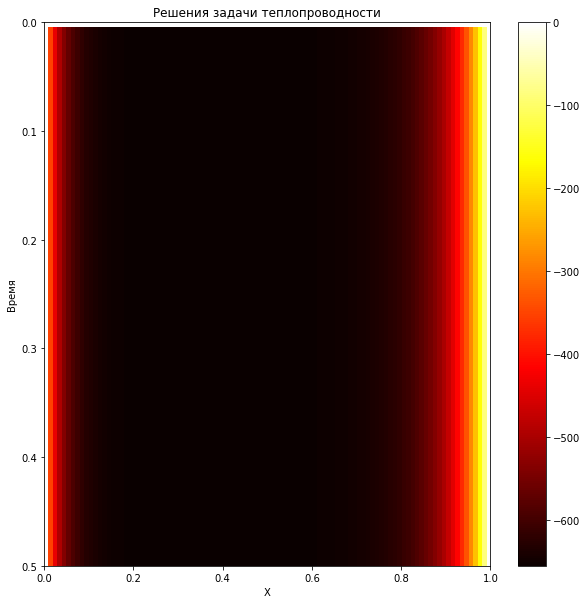

In [14]:
X_samples = 100
T_samples = 100
u = solve(X_samples, T_samples)
print_matrix(u, X_samples, T_samples)

In [9]:
np.isnan(u).sum()

0

In [10]:
u[:,-3] = -100

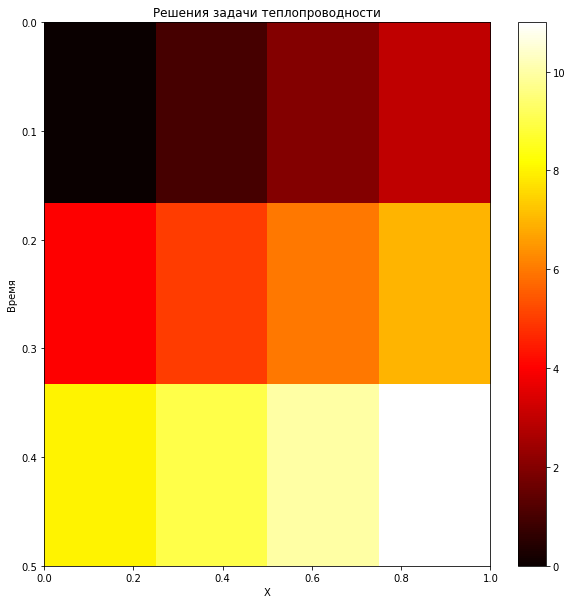

In [11]:

grid = np.array([[0, 1 , 2, 3],[4, 5 ,6, 7],[8, 9 , 10, 11]])
print_matrix(grid, X_samples, T_samples)

In [12]:
nan((3,4))[0]

array([nan, nan, nan, nan])